### Prediction of customer retention 
##### We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. This data set provides information to help us predict what behavior will help in retaining customers. We can analyze all relevant customer data and develop focused customer retention programs.
The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

### Importing the libraries and the files

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('telco.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Let's place the target column at last of the data frame

In [11]:
last_col = df.pop('Churn')
df.insert(10, 'Churn', last_col)
df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


### Preprocessing the data -
Now some of the features are selected for modeling. Also, the target data type should be an integer, as it is a requirement by the algorithm.

In [12]:
df = df[['AccountWeeks', 'DataPlan', 'ContractRenewal', 'DayCalls', 'DayMins', 'MonthlyCharge', 'Churn']]
df['Churn'] = df['Churn'].astype('int')
df.head()

,AccountWeeks,DataPlan,ContractRenewal,DayCalls,DayMins,MonthlyCharge,Churn
0,128,1,1,110,265.1,89.0,0
1,107,1,1,123,161.6,82.0,0
2,137,0,1,114,243.4,52.0,0
3,84,0,0,71,299.4,57.0,0
4,75,0,0,113,166.7,41.0,0


In [13]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Selecting features

In [14]:
x = df[['AccountWeeks', 'DataPlan', 'ContractRenewal', 'DayCalls', 'DayMins', 'MonthlyCharge']].values
y = df['Churn'].values

In [15]:
x[:5]

array([[128. ,   1. ,   1. , 110. , 265.1,  89. ],
       [107. ,   1. ,   1. , 123. , 161.6,  82. ],
       [137. ,   0. ,   1. , 114. , 243.4,  52. ],
       [ 84. ,   0. ,   0. ,  71. , 299.4,  57. ],
       [ 75. ,   0. ,   0. , 113. , 166.7,  41. ]])

In [16]:
y[:5]

array([0, 0, 0, 0, 0])

### Normalize the dataset

In [17]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:5]

array([[ 0.67648946,  1.6170861 ,  0.32758048,  0.47664315,  1.56676695,
         1.99072703],
       [ 0.14906505,  1.6170861 ,  0.32758048,  1.12450284, -0.33373776,
         1.56451025],
       [ 0.9025285 , -0.61839626,  0.32758048,  0.67598459,  1.16830364,
        -0.26213309],
       [-0.42859027, -0.61839626, -3.05268496, -1.46693591,  2.19659605,
         0.04230746],
       [-0.6546293 , -0.61839626, -3.05268496,  0.62614923, -0.24008971,
        -0.93190232]])

### Train and test data split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2666, 6) (2666,)
Test set: (667, 6) (667,)


### Building the model

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [20]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [21]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.93496084, 0.06503916],
       [0.82224182, 0.17775818],
       [0.77625279, 0.22374721],
       ...,
       [0.77134007, 0.22865993],
       [0.909969  , 0.090031  ],
       [0.4835789 , 0.5164211 ]])

### Model Evaluation

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat , pos_label=0)

0.8595166163141994

The jaccard score near to 1 means a good prediction. So our logistic regression can predict the outcome accurately.

#### By using confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

Now we will build a function that will print and plot the confusion matrix. Normalization can be applied by setting `normalize=True`

In [24]:
def plot_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  5  84]
 [  9 569]]


Confusion matrix, without normalization
[[  5  84]
 [  9 569]]


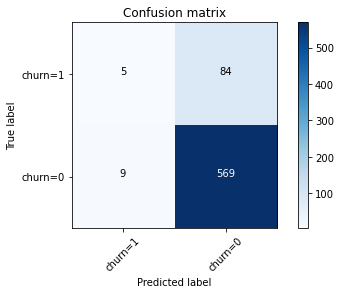

In [25]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [26]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       578
           1       0.36      0.06      0.10        89

    accuracy                           0.86       667
   macro avg       0.61      0.52      0.51       667
weighted avg       0.80      0.86      0.81       667



In [27]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.36344575249630223